In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    context="paper",
    style="whitegrid",
    rc={
        "figure.figsize": (3.5, 3.5),
        "figure.dpi": 150,
        "savefig.dpi": 1000,
        "figure.constrained_layout.use": True,
    },
)


In [9]:
df_cnn = pd.read_csv("../data/out/generalization/e7ivqipk.csv")
df_cnn["filter"] = "cnn"
df_lmb = pd.read_csv("../data/out/lmb_summary.csv")
df_glmb = pd.read_csv("../data/out/glmb_summary.csv")
df_combined = pd.concat([df_cnn, df_lmb, df_glmb]).reset_index(drop=True)


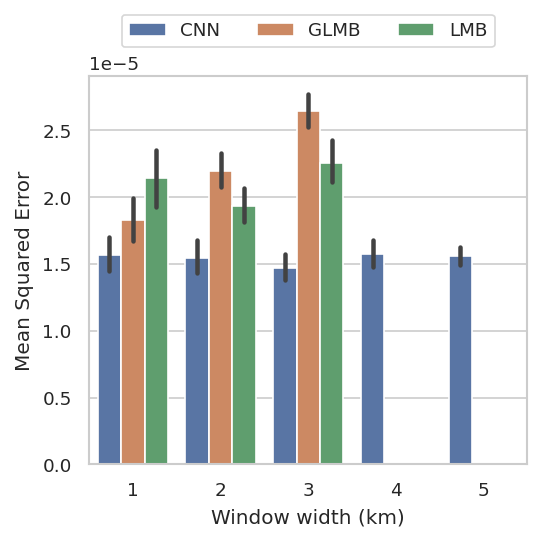

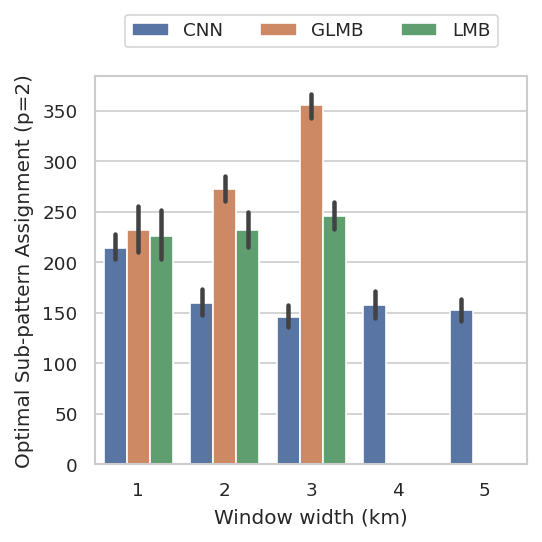

In [15]:
data = (
    df_combined
    .query("simulation_idx > 50")
    .groupby(["filter", "scale", "simulation_idx"], as_index=False)
    .mean()
    .replace({"cnn": "CNN", "lmb": "LMB", "glmb": "GLMB"})
)

plt.figure()
sns.barplot(data=data, x="scale", y="mse", hue="filter", errorbar="ci")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3, title=None)
plt.ylabel("Mean Squared Error")
plt.xlabel("Window width (km)")
plt.savefig("../figures/mse.pdf")
plt.savefig("../figures/mse.png")
plt.show()

plt.figure()
sns.barplot(data=data, x="scale", y="ospa", hue="filter", errorbar="ci")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3, title=None)
plt.ylabel("Optimal Sub-pattern Assignment (p=2)")
plt.xlabel("Window width (km)")
plt.savefig("../figures/ospa.pdf")
plt.savefig("../figures/ospa.png")
plt.show()

# plt.figure()
# sns.barplot(data=data.query("filter != 'CNN'"), x="scale", y="ospa1", hue="filter", errorbar="ci")
# plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3, title=None)
# plt.ylabel("Optimal Sub-pattern Assignment (p=1)")
# plt.xlabel("Window width (km)")
# plt.savefig("../figures/ospa1.pdf")
# plt.savefig("../figures/ospa1.png")
# plt.show()


In [11]:
df_combined.query("scale == 3 and filter == 'glmb'")["simulation_idx"].unique().shape

(64,)

/home/damow/.pyenv/versions/3.9.9/envs/mtt/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/damow/.pyenv/versions/3.9.9/envs/mtt/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/damow/.pyenv/versions/3.9.9/envs/mtt/lib/python3.9/site-packages/seaborn/axisgrid.py:208: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  self._figure.subplots_adjust(right=right)


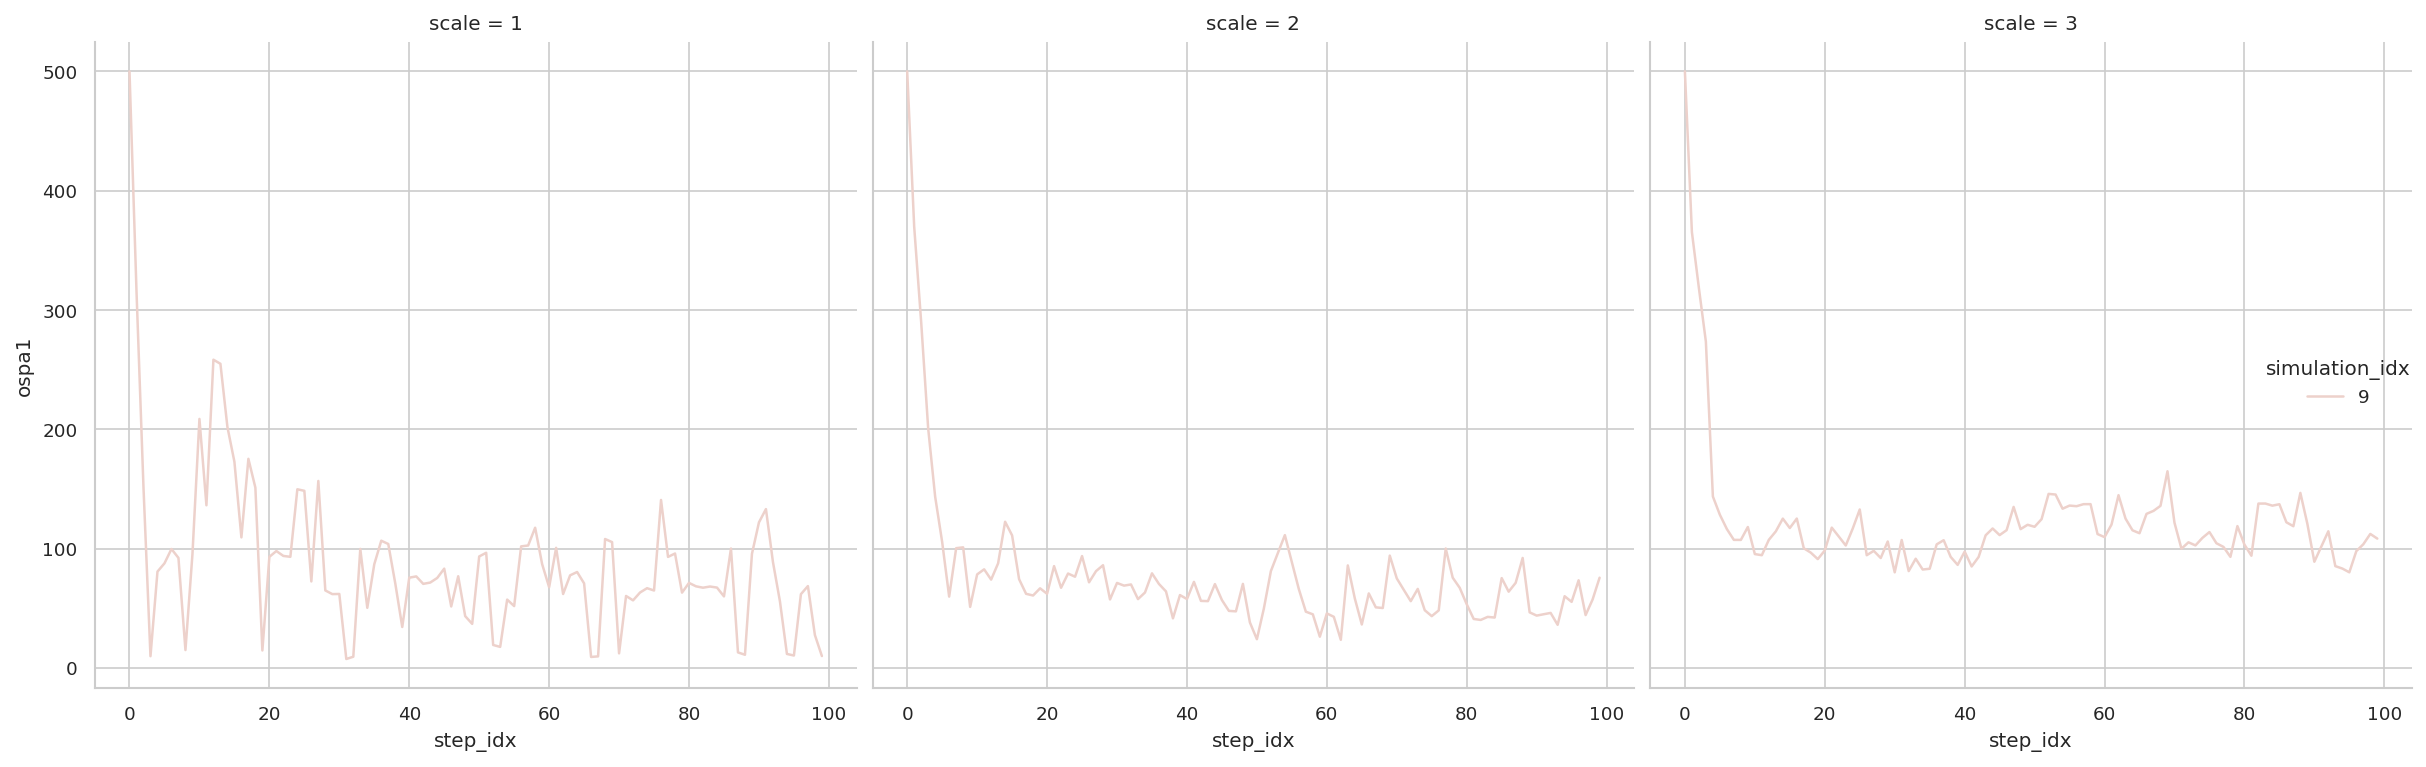

In [12]:
sns.relplot(
    df_combined.query("scale <= 3 and filter == 'lmb' and simulation_idx == 9"),
    x="step_idx",
    y="ospa1",
    hue="simulation_idx",
    col="scale",
    kind="line",
)

In [1]:
# plt.figure()
data["cardinality_error"] = data["cardinality_output"] - data["cardinality_truth"]
sns.relplot(
    data=data.query("filter == 'CNN'"),
    x="simulation_idx",
    y="cardinality_error",
    hue="filter",
    row="scale",
    style="filter",
    errorbar="ci",
    kind="line",
)
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3, title=None)
plt.ylabel("Optimal Sub-pattern Assignment (OSPA)")
plt.xlabel("Number of Sensors")
plt.show()


NameError: name 'data' is not defined

In [14]:
data.query("scale == 3")["cardinality_truth"].mean()


89.98312217194568